# Geodesics around Kerr Naked Singularity 

First, we import the necessary modules.

In [20]:
! pip3 install -U -q jaxlib jax

In [21]:
! pip3 install git+https://github.com/adxsrc/xaj.git

  Cloning https://github.com/adxsrc/xaj.git to /tmp/pip-req-build-gm0wsck7
  Running command git clone -q https://github.com/adxsrc/xaj.git /tmp/pip-req-build-gm0wsck7


In [22]:
! pip3 install git+https://github.com/adxsrc/fadge.git
! pip3 install git+https://github.com/adxsrc/pray.git

  Cloning https://github.com/adxsrc/fadge.git to /tmp/pip-req-build-up0zqojo
  Running command git clone -q https://github.com/adxsrc/fadge.git /tmp/pip-req-build-up0zqojo
  Cloning https://github.com/adxsrc/pray.git to /tmp/pip-req-build-twxogkdk
  Running command git clone -q https://github.com/adxsrc/pray.git /tmp/pip-req-build-twxogkdk


In [23]:
%load_ext autoreload
%autoreload 2

from jax.config import config
config.update("jax_enable_x64", True)

from pray      import PRay
from fadge.viz import KSHorizons as Horizons
from jax       import numpy as np

from matplotlib import pyplot as plt
from itertools  import product

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We then instasize `PRay` into an object

In [24]:
pray = PRay(aspin=1.1, atol=1e-3, rtol=0, names={'ind':'lambda'})

There is no event horizon


To setup the initial conditions, we first set the camera location, and then specify the image.

Experiment 1: Grid from x, y = -9.75 to x, y = 9.75

In [26]:
pray.set_cam(1e4, 90, 0)
pray.set_image(20, 40)

print('Array shape of the initial conditions:', pray._ic.shape)

/usr/local/lib/python3.7/dist-packages/jax/experimental/maps.py:544: UserWarning: xmap is an experimental feature and probably has bugs!
  warn("xmap is an experimental feature and probably has bugs!")


Array shape of the initial conditions: (2, 4, 40, 40)


To perform geodesic integration, simply call `pray.geode()`.
When no argument is specified, the integration is carried out to `-2 * r_obs`.
The return values are the full steps during the integration.

In [27]:
l, f = pray.geode() # full step output

fx = f[:,0,1]
fy = f[:,0,2]
fz = f[:,0,3]

/usr/local/lib/python3.7/dist-packages/jax/experimental/maps.py:544: UserWarning: xmap is an experimental feature and probably has bugs!
  warn("xmap is an experimental feature and probably has bugs!")


jit(masked_do); input: Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=0/1)> Traced<ShapedArray(float32[2,4,40,40])>with<DynamicJaxprTrace(level=0/1)> Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=0/1)> [Traced<ShapedArray(float32[2,4,40,40])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[2,4,40,40])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[2,4,40,40])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[2,4,40,40])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[2,4,40,40])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[2,4,40,40])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[2,4,40,40])>with<DynamicJaxprTrace(level=0/1)>]


 50%|█████     | 50/100 [03:47<06:32,  7.86s/it, lambda=-1.00e+04, dlambda=-0.000627]


Integration unfinished, try increasing allowed number of steps N=10000


 50%|█████     | 50/100 [04:18<?, ?it/s, lambda=-1.01e+04, dlambda=-0.00247 ]


Integration unfinished, try increasing allowed number of steps N=10000


Because `PRay` uses `XAJ` for solving ODEs, it supports dense output.
We can put a lot of sampling points near the black hole for better visualization of the geodeiscs.

We are finally ready to plot the results.

In [8]:
def plot_fix_y(i, j0, j1, x, y, z, size, a, un_orbit):
  from fadge.viz import KSHorizons as Horizons
  horizons = Horizons(1.1)

  fig, axes = plt.subplots(2,2, figsize=(12,12), sharex=True, sharey=True)
  fig.tight_layout()
  for ax in [a for ax in axes for a in ax]:
      ax.set_xlim(-size,size)
      ax.set_ylim(-size,size)
      ax.set_aspect('equal')

  ax = axes[0][0]
  horizons(ax, color='k')
  ax.set_xlabel('x')
  ax.set_ylabel('z')

  ax = axes[0][1]
  horizons(ax, color='k')
  ax.set_xlabel('y')
  ax.set_ylabel('z')

  ax = axes[1][0]
  horizons(ax, color='k', faceon=True)
  ax.set_xlabel('x')
  ax.set_ylabel('y')

  for j in range(j0,j1):
      axes[0][0].plot(x[:,i,j], z[:,i,j], '-o', s = 1, color=f'C{j//4}')
      axes[0][1].plot(y[:,i,j], z[:,i,j], '-o', s = 1, color=f'C{j//4}')
      axes[1][0].plot(x[:,i,j], y[:,i,j], '-o', s = 1, color=f'C{j//4}')

  if un_orbit:
    radius = unstable_orbit(a)

    theta = np.linspace( 0 , 2 * np.pi , 150 )
    
    xx = radius * np.cos(theta)
    yy = radius * np.sin(theta)
    
    ax = axes[0][0]
    ax.plot(xx,yy)

def unstable_orbit(a):
  ang = (np.arccosh(a))/3
  radius = 4*(np.cosh(ang))**2 # unstable circular photon orbit radius
  return(radius)


In [13]:
def plot_fix_z(j, i0, i1, x, y, z, size, a, un_orbit):
  from fadge.viz import KSHorizons as Horizons
  horizons = Horizons(1.1)

  fig, axes = plt.subplots(2,2, figsize=(12,12), sharex=True, sharey=True)
  fig.tight_layout()
  for ax in [a for ax in axes for a in ax]:
      ax.set_xlim(-size,size)
      ax.set_ylim(-size,size)
      ax.set_aspect('equal')

  ax = axes[0][0]
  horizons(ax, color='k')
  ax.set_xlabel('x')
  ax.set_ylabel('z')

  ax = axes[0][1]
  horizons(ax, color='k')
  ax.set_xlabel('y')
  ax.set_ylabel('z')

  ax = axes[1][0]
  horizons(ax, color='k', faceon=True)
  ax.set_xlabel('x')
  ax.set_ylabel('y')

  for i in range(i0,i1):
      axes[0][0].plot(x[:,i,j], z[:,i,j], '-o', color=f'C{i//4}')
      axes[0][1].plot(y[:,i,j], z[:,i,j], '-o', color=f'C{i//4}')
      axes[1][0].plot(x[:,i,j], y[:,i,j], '-o', color=f'C{i//4}')

  if un_orbit:
    radius = unstable_orbit(a)

    theta = np.linspace( 0 , 2 * np.pi , 150 )
    
    xx = radius * np.cos(theta)
    yy = radius * np.sin(theta)
    
    ax.plot(xx,yy)

def unstable_orbit(a):
  ang = (np.arccosh(a))/3
  radius = 4*(np.cosh(ang))**2 # unstable circular photon orbit radius
  return(radius)


Look at all prograde orbits with initial z = 0.25. Note that all prograde orbits are unbounded.

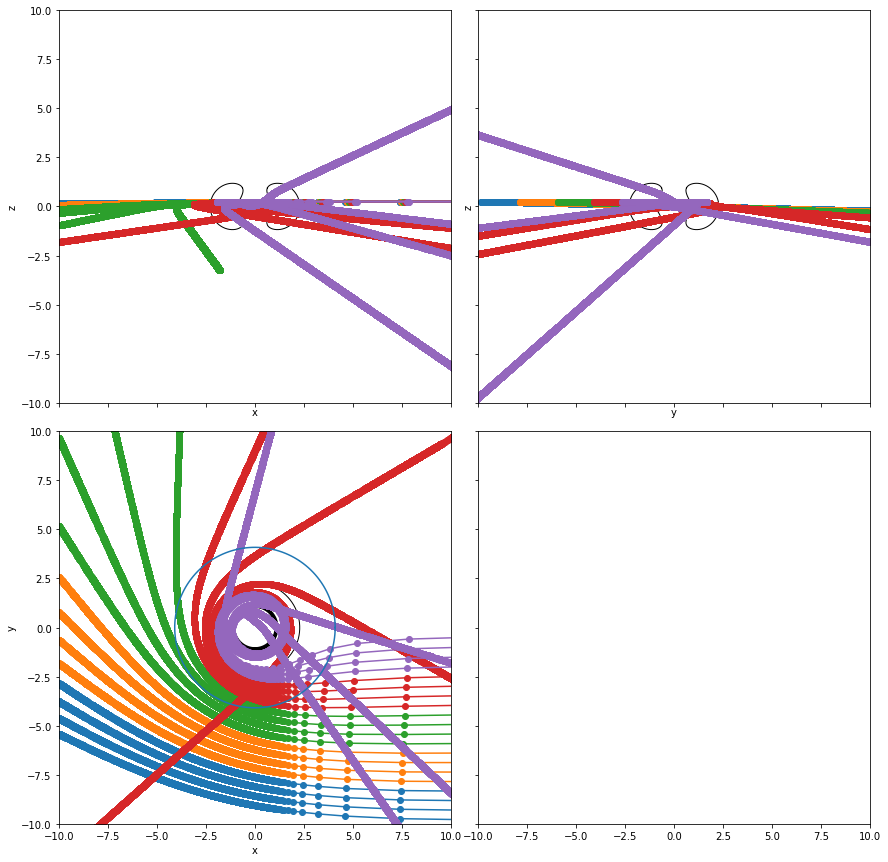

In [14]:
plot_fix_z(20, 0, 20, fx, fy, fz, 10, 1.1, True)

Zooming in some prograde orbits nearer to the singularity

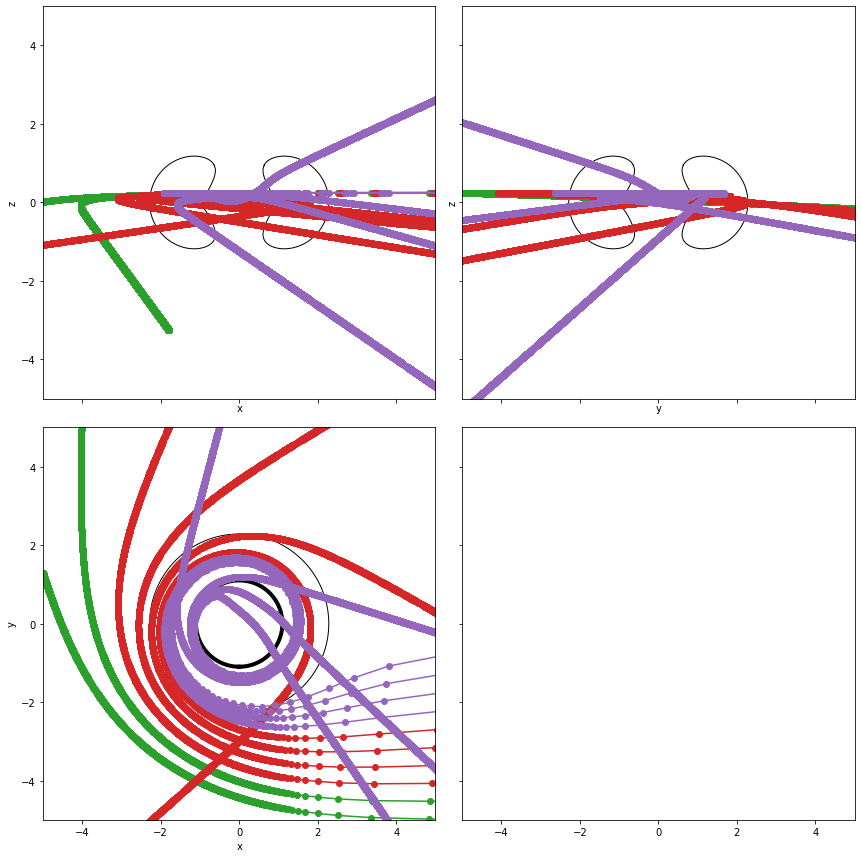

In [ ]:
plot_fix_z(20, 10, 20, 5)

Look at the retrograde orbits with initial z = 0.25. Note that there is a division between bounded and unbounded orbit.

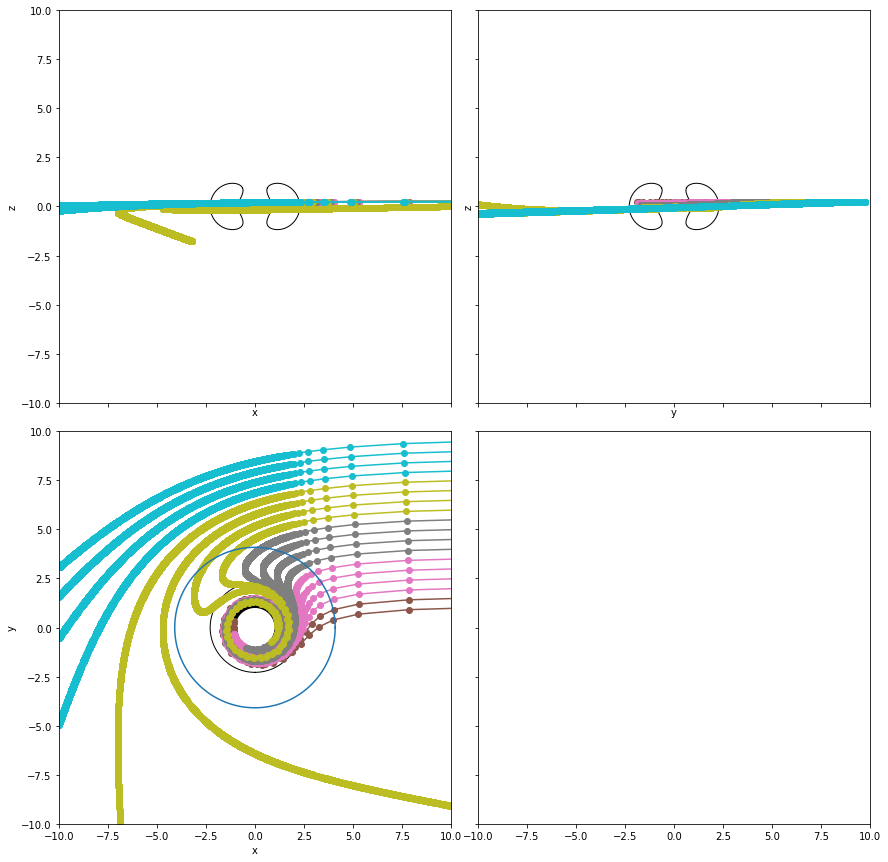

In [ ]:
plot_fix_z(20, 22, 40, 10, 1.1, True)

Look at the prograde orbits with initial z = 2.5.

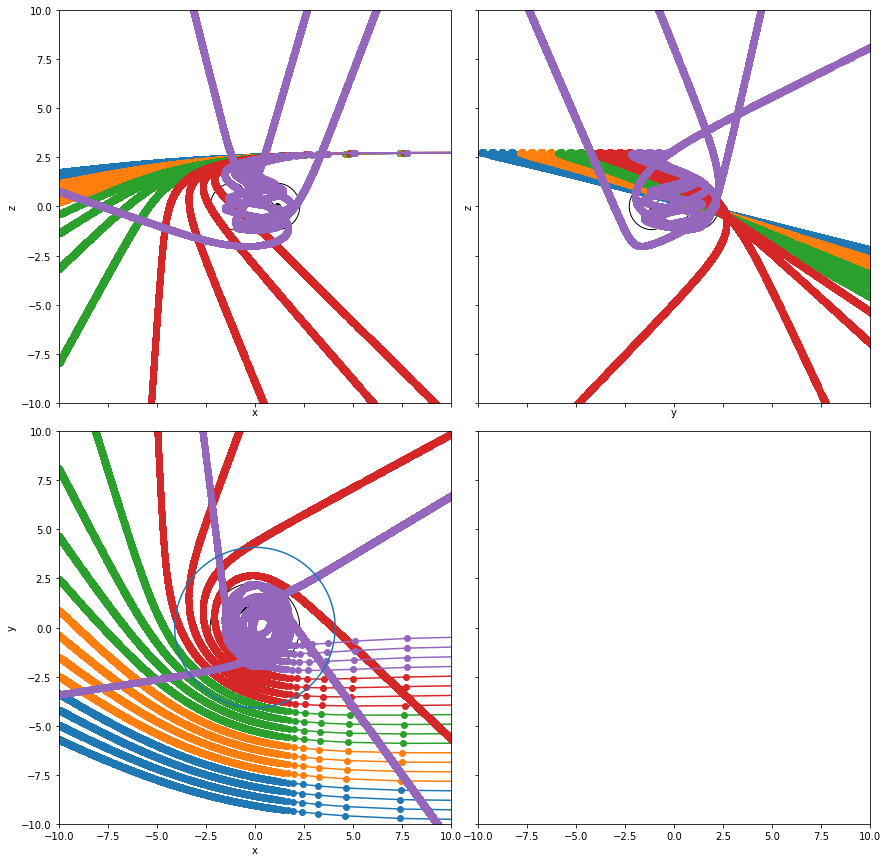

In [ ]:
plot_fix_z(25, 0, 20, fx, fy, fz, 10, 1.1, True)

Here is a selected retrograde orbit with initial x = 2.5 that is close to the naked singularity. The orbit oscillates between the ergosphere a few times.

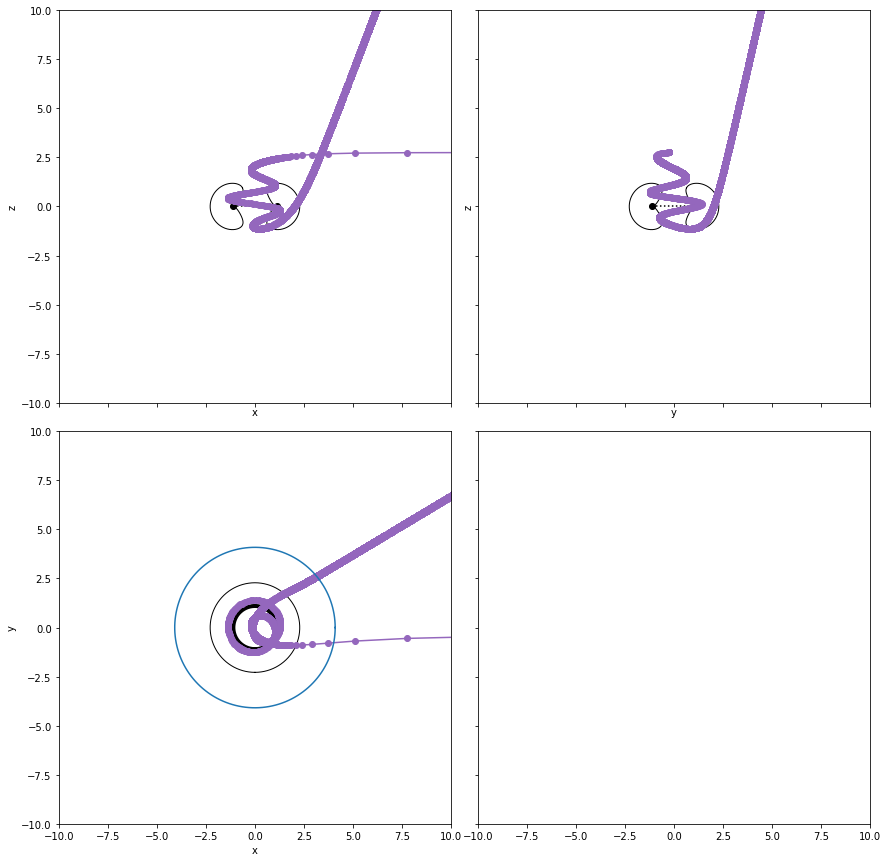

In [ ]:
plot_fix_z(25, 19, 20, fx, fy, fz, 10, 1.1, True)

Here is two selected retrograde orbits that are divided by the unstable spherical region with initial z = 2.5

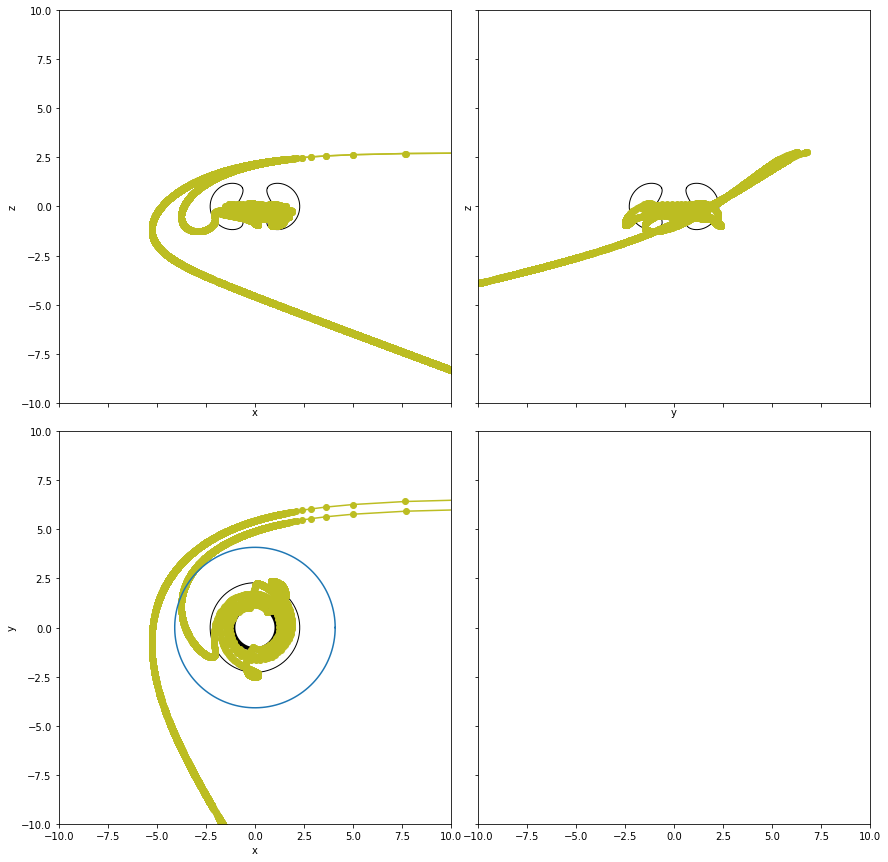

In [ ]:
plot_fix_z(25, 32, 34, fx, fy, fz, 10, 1.1, True)

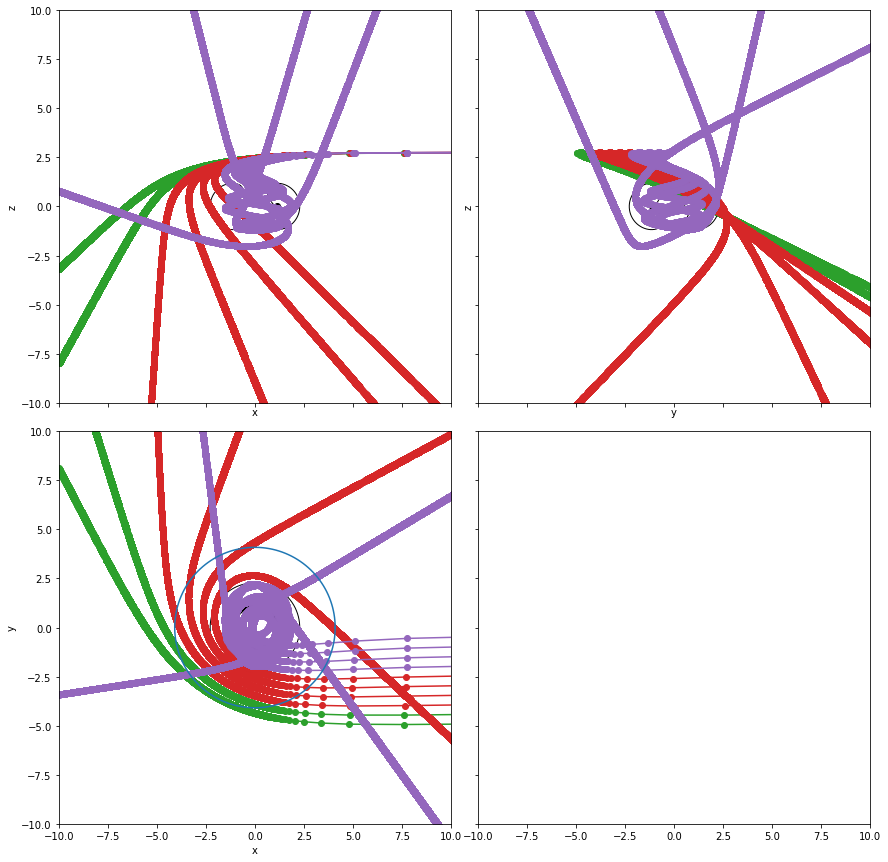

In [ ]:
plot_fix_z(25, 10, 20, fx, fy, fz, 10, 1.1, True)

Below are prograde orbits with initial z = -2.5. They give very similar results with the above prograde orbits with initial z = 2.5. The slight differences are perhaps because of the rounding errors of the initial z values as setup by the camera grid. There is a symmetry with the xy plane

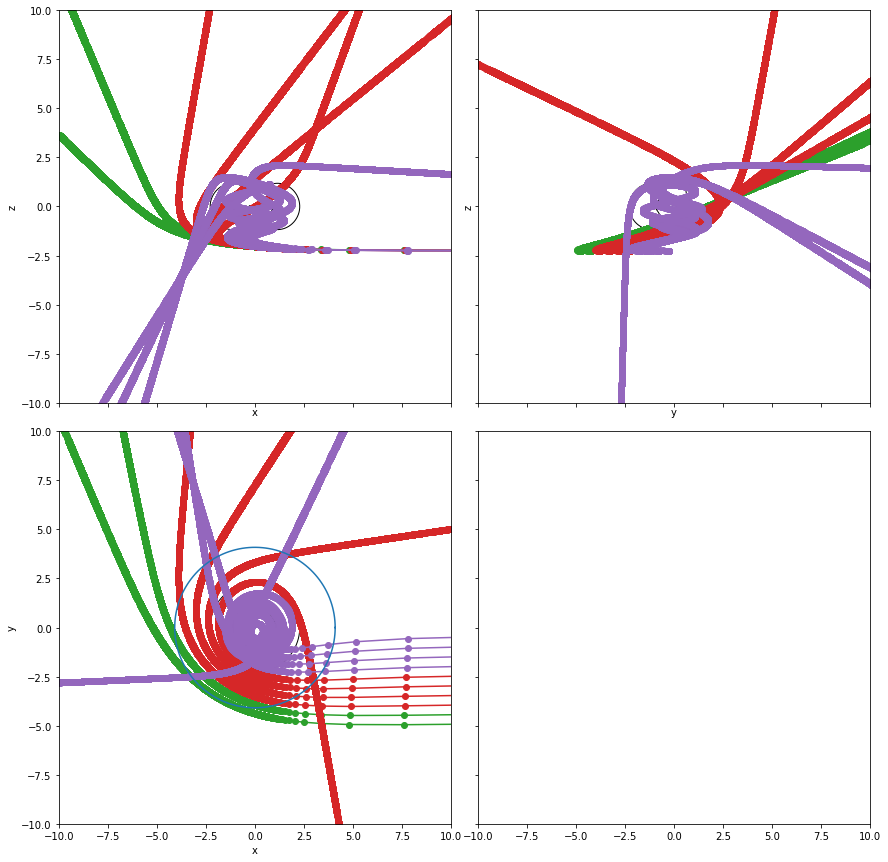

In [ ]:
plot_fix_z(15, 10, 20, fx, fy, fz, 10, 1.1, True)

There seems to be very bizarre "loops" when certain photons enter the ergosphere. This may be a numerical error because the numerical algorithm becomes very sensitive in turbulent regions. We can check this by confirming if conserved quantities (energy, angular momentum, Carter's constnat) are the same along the geodesics. We can also compare the data with the effective potential of the photons as a function of the conserved quantities.

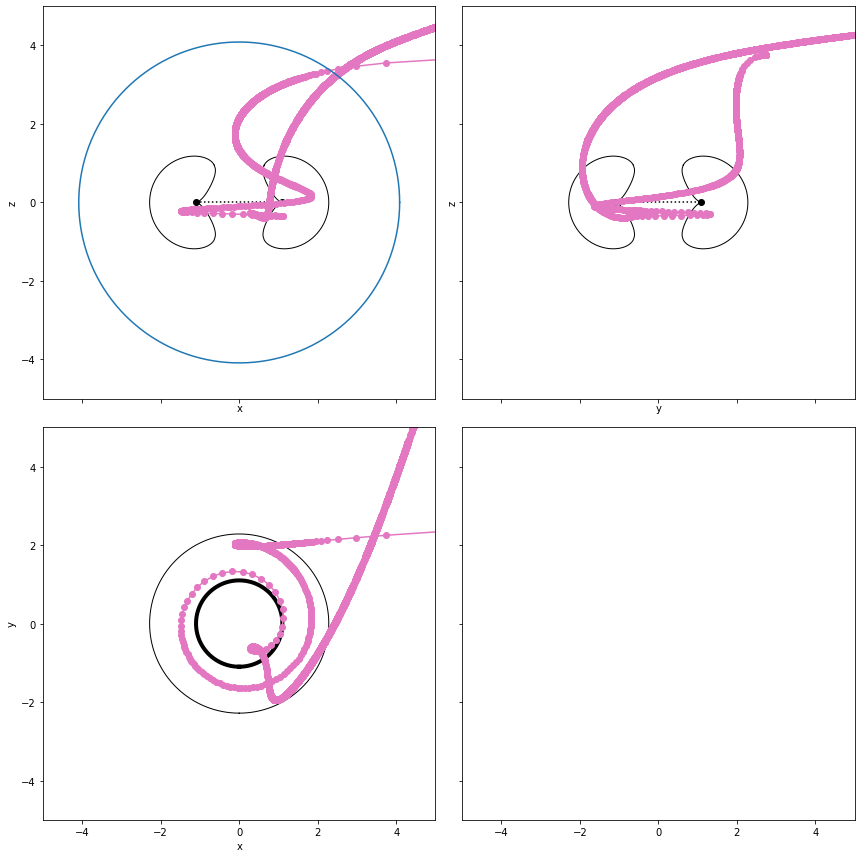

In [ ]:
plot_fix_y(25, 27, 28, fx, fy, fz, 5, 1.1, True)

In [16]:
def deflection_angle(f):

  size1 = np.size(f[0,0,0,:,0])
  size2 = np.size(f[0,0,0,0,:])                    
  theta = np.empty((size1, size2))

  for i, j in product(range(size1), range(size2)):
    vf = f[:,1,1:3,i,j][0] # final velocity vector
    vi = f[:,1,1:3,i,j][-1] # initial velocity vector
    dp = np.dot(vf, vi)
    normvf = np.linalg.norm(vf) # final speed
    normvi = np.linalg.norm(vi) # initial speed
    angle = np.arccos(dp/(normvf*normvi)) # (vi dot vf) / (|vi| |vf|) = arccos(theta)

    theta = theta.at[(i,j)].set(angle)

  return theta

def theta_plot(f, theta):

  size1 = np.size(f[0,0,0,:,0])
  size2 = np.size(f[0,0,0,0,:])     

  alpha = np.array([])         
  beta = np.array([])   
  angle = np.array([])         

  for i, j in product(range(size1), range(size2)):
    
    alpha_ = -f[:, 0, 3, i, j][-1]
    beta_ = +f[:, 0, 2, i, j][-1]
    theta_ = theta[i, j]

    if np.isnan(theta_):
      theta_ = 0

    alpha = np.append(alpha, alpha_)
    beta = np.append(beta, beta_)
    angle = np.append(angle, theta_)
  
  fig, ax = plt.subplots(1,1,figsize=(16,16))
  plot_area = (16*72)**2 # in points
  size = (plot_area)/(size1*size2)

  plt.scatter(alpha, beta, c = angle, marker = "s", s = size, cmap = "seismic")
  ax.set_xlabel("alpha")
  ax.set_ylabel("beta")

Based on the deflection angle, let's plot an alpha-beta image of the black hole at theta = 90o and phi = 0o (from +x axis). 

Red indicates "mirror" regions where light is reflected back to the camera. 

Inside the photon ring, Blue indicates "lens" region where light goes through the naked singularity (for inside the photon ring). 

Black indicates regions of bounded orbits where retrograde orbits fall within the unstable spherical photon orbit and cannot escape from the singularity.

Outside the photon ring, blue indicates regions of deflected hyperbolic orbits.

White indicates regions of perpendicular deflected orbits.

The deflection angle scales from 0 deg (black) to 90 deg (white) to 180 deg (red)

In [17]:
theta = deflection_angle(f)

Text(0, 0.5, 'z')

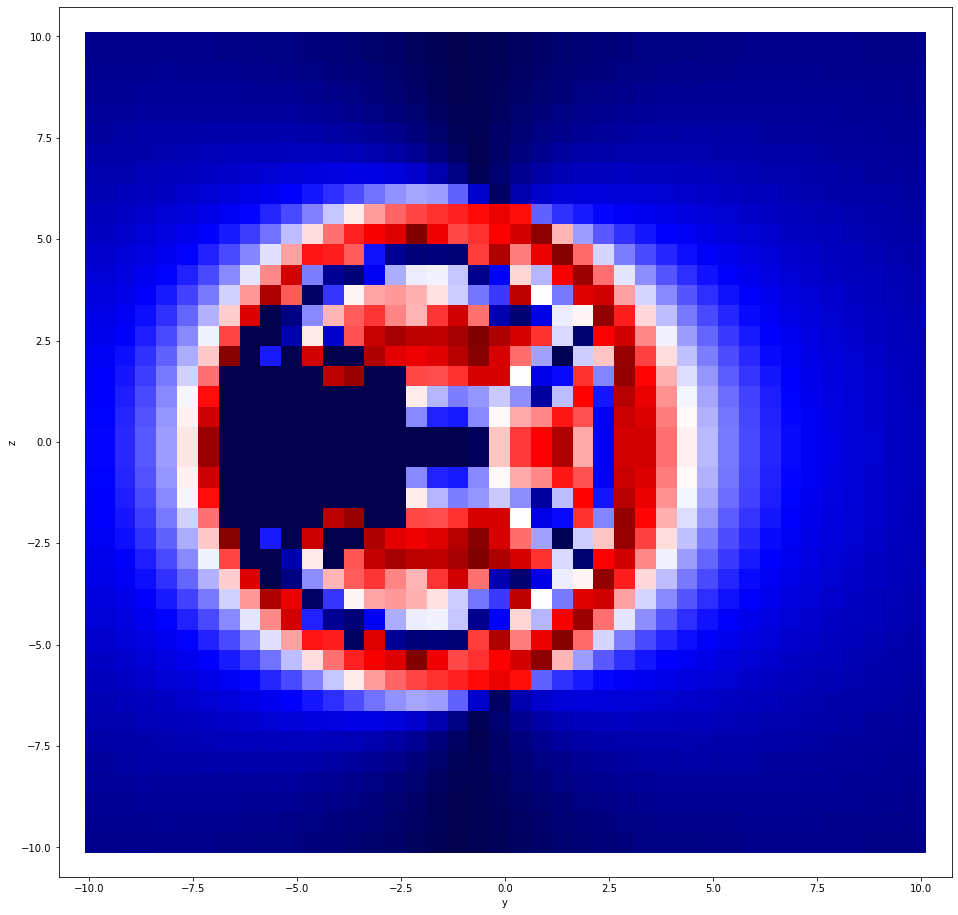

In [19]:
  size1 = np.size(f[0,0,0,:,0])
  size2 = np.size(f[0,0,0,0,:])     

  alpha = np.array([])         
  beta = np.array([])   
  angle = np.array([])         

  for i, j in product(range(size1), range(size2)):
    
    alpha_ = f[:, 0, 3, i, j][-1]
    beta_ = -f[:, 0, 2, i, j][-1]
    theta_ = theta[i, j]

    if np.isnan(theta_):
      theta_ = 0

    alpha = np.append(alpha, alpha_)
    beta = np.append(beta, beta_)
    angle = np.append(angle, theta_)
  
  fig, ax = plt.subplots(1,1,figsize=(16,16))
  plot_area = (16*72)**2 # in points
  size = (plot_area)/(size1*size2)

  plt.scatter(beta, alpha, c = angle, marker = "s", s = size, cmap = "seismic")
  ax.set_xlabel("y")
  ax.set_ylabel("z")